# Linear binary classification

Here we'll train binary linear classifier on data of credit scoring, analyze weights of the model and will work with categorical features in linear models.

We'll also work with metrics and find optimal hyperparameters.

## Description of the columns:
* account: banck account status (-1: negative balance, 0: there is no bank account, 1: less than 200 conventional units, 2: more than 200 conventional units)
* duration: for what period is credit required
* credit_history: rank relatively to credit history (from 0 - an excellent credit history to 4 - awful crdit history)
* amount: what sum is required for credit
* savings: 
saving account (0: there is no, 1: <100, 2: 100<=...<500, 3: 500<=...<1000, 4: >=1000)
* employment: time of working on the current position (0: not working, 1: less than 1 year, 2: from a year to 4 years, 3: from 4 to 7 years, 4: more than 7 yeras)
*  guarantors: 1: there are, 0: there are not
*  residence: 
term of residenc in years
*  age: age divided by 100
*  credits_number: number of active credits
*  job: 0: unemployed, 1: unqualified, 2: qualified specialist, 3: high position or business
*  maintenance_people: number of people who supported by the borrower
*  telephone: is there a telephone number (1: yes, 0: no)
*  foreign: is the person foreign (1: yes, 0: no)
*  real_estate: are there some estate (1: yes, 0: no)
*  life insurance: is there life insurance (1: yes, 0: no)
*  car: is there car (1: yes, 0: no)
*  housng_rent: is the property rented (1: yes, 0: no)
*  sex: 1: male, 0: female
*  purpose: what purpose of the credit (a few variants)
*  target: 1: credit approved, 0: credit not approved

As you can see, all the features except the last are categorical features.t 


## Brief data exploration

In [1]:
import pandas as pd

In [2]:
tab = pd.read_excel("scoring.xls")

In [3]:
tab.head()

,account,duration,credit_history,amount,savings,employment,guarantors,residence,age,credits_number,...,maintenance_people,telephone,foreign,real_estate,life_insurance,car,housing_rent,sex,purpose,target
0,1,0.18,2,0.13110,2,2,1,4,0.34,1,...,1,0,1,0,0,1,0,1,business,1
1,-1,0.18,0,0.15520,1,3,1,1,0.31,1,...,1,1,1,0,1,0,0,1,business,1
2,-1,0.12,2,0.04510,1,3,1,4,0.21,1,...,1,0,1,0,1,0,1,1,retraining,0
3,-1,0.30,0,0.40360,0,1,1,3,0.25,3,...,1,0,1,0,0,1,0,1,business,1
4,0,0.36,2,0.09095,1,2,1,4,0.37,1,...,1,1,1,0,0,0,0,1,education,0


In [4]:
tab.dtypes

account                 int64
duration              float64
credit_history          int64
amount                float64
savings                 int64
employment              int64
guarantors              int64
residence               int64
age                   float64
credits_number          int64
job                     int64
maintenance_people      int64
telephone               int64
foreign                 int64
real_estate             int64
life_insurance          int64
car                     int64
housing_rent            int64
sex                     int64
purpose                object
target                  int64
dtype: object

The features mainly numerical

In [5]:
tab['target'].value_counts()

target
1    300
0    300
Name: count, dtype: int64

The classes are in balance.

Let's create object-features matrix and matrix with answers (target column).

For now we remove the column with categorical features (purpose) and leave only numerical features.

Let's create object-features matrix and matrix with answers (target column).

In [6]:
X = tab[tab.columns[:-2]]
y = tab['target']

In [7]:
X.head()

,account,duration,credit_history,amount,savings,employment,guarantors,residence,age,credits_number,job,maintenance_people,telephone,foreign,real_estate,life_insurance,car,housing_rent,sex
0,1,0.18,2,0.13110,2,2,1,4,0.34,1,2,1,0,1,0,0,1,0,1
1,-1,0.18,0,0.15520,1,3,1,1,0.31,1,2,1,1,1,0,1,0,0,1
2,-1,0.12,2,0.04510,1,3,1,4,0.21,1,2,1,0,1,0,1,0,1,1
3,-1,0.30,0,0.40360,0,1,1,3,0.25,3,2,1,0,1,0,0,1,0,1
4,0,0.36,2,0.09095,1,2,1,4,0.37,1,2,1,1,1,0,0,0,0,1


In [8]:
X.shape, y.shape

((600, 19), (600,))

## Data preparation

### Train-test splitting

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, \
                                                    test_size=0.3, \
                                                    stratify=y,
                                                    shuffle=True,
                                                    random_state=0
)

In [11]:
y_train.value_counts()

target
1    210
0    210
Name: count, dtype: int64

In [12]:
y_test.value_counts()

target
0    90
1    90
Name: count, dtype: int64

### Data normalizing

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Linear model fitting and counting of metrics

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
from sklearn.metrics import accuracy_score

In [17]:
clf_lr = LinearRegression()
clf_lr.fit(X_train, y_train)

LinearRegression()

In [18]:
y_pred = clf_lr.predict(X_test)

In [19]:
accuracy_score(y_test, y_pred > 0.5)

0.6388888888888888

### Importance and weights of features

In linear model as an importance of a feature criteria we can use the weights of the model. The more weight value for the feature the more the feature is important for making predictions.

Weights for linear regression are stored in `coef_` attribute.

In [20]:
clf_lr.coef_

array([ 0.02574548, -0.09842138,  0.08713456,  0.00568939,  0.01644115,
        0.05126163, -0.03218109,  0.0030181 ,  0.04411632, -0.05803757,
       -0.00647939, -0.01000657,  0.03916392, -0.04547125,  0.06517249,
       -0.00083364,  0.06442094, -0.03741182,  0.04326236])

While checking the weights symptoms of overfitting can be found out - very large by module weights values.

Let's sort the weights by increasing and map to such a sorted list the correspondent features from dataframe. It's will be useful to understand of importance of particular features (or to understand on what feature we have overfitting).

In [21]:
tmp = pd.DataFrame([X.columns, clf_lr.coef_]).transpose()
tmp

,0,1
0,account,0.025745
1,duration,-0.098421
2,credit_history,0.087135
3,amount,0.005689
4,savings,0.016441
5,employment,0.051262
6,guarantors,-0.032181
7,residence,0.003018
8,age,0.044116
9,credits_number,-0.058038


In [22]:
tmp.columns = ["feature_name", 'weights']
tmp

,feature_name,weights
0,account,0.025745
1,duration,-0.098421
2,credit_history,0.087135
3,amount,0.005689
4,savings,0.016441
5,employment,0.051262
6,guarantors,-0.032181
7,residence,0.003018
8,age,0.044116
9,credits_number,-0.058038


In [23]:
tmp.sort_values('weights')

,feature_name,weights
1,duration,-0.098421
9,credits_number,-0.058038
13,foreign,-0.045471
17,housing_rent,-0.037412
6,guarantors,-0.032181
11,maintenance_people,-0.010007
10,job,-0.006479
15,life_insurance,-0.000834
7,residence,0.003018
3,amount,0.005689


<u><b>Note</b></u>: you can interpret value of weights <u>only</u> if the data scaled. Else the module of the weight will be depend on scale of the feature.

### Working with categorical features

Let's use one-hot encoding to the `purpose` column.

In [24]:
tab_ohe = pd.get_dummies(tab, "purpose")

In [25]:
tab_ohe.head()

,account,duration,credit_history,amount,savings,employment,guarantors,residence,age,credits_number,...,purpose_business,purpose_car_new,purpose_car_used,purpose_domestic_appliances,purpose_education,purpose_furniture,purpose_others,purpose_repairs,purpose_retraining,purpose_television
0,1,0.18,2,0.13110,2,2,1,4,0.34,1,...,True,False,False,False,False,False,False,False,False,False
1,-1,0.18,0,0.15520,1,3,1,1,0.31,1,...,True,False,False,False,False,False,False,False,False,False
2,-1,0.12,2,0.04510,1,3,1,4,0.21,1,...,False,False,False,False,False,False,False,False,True,False
3,-1,0.30,0,0.40360,0,1,1,3,0.25,3,...,True,False,False,False,False,False,False,False,False,False
4,0,0.36,2,0.09095,1,2,1,4,0.37,1,...,False,False,False,False,True,False,False,False,False,False


And let's train our model again with one-hot encoded categorical feature

In [26]:
X_ohe = tab_ohe.drop("target", axis=1)

In [27]:
X_train_ohe, X_test_ohe, y_train, y_test = train_test_split(X_ohe, y, \
                                                    test_size=0.3, \
                                                    shuffle=True,
                                                    random_state=0
)

In [28]:
scaler = StandardScaler()
X_train_ohe = scaler.fit_transform(X_train_ohe)
X_test_ohe = scaler.transform(X_test_ohe)

In [29]:
clf = LinearRegression()

clf.fit(X_train_ohe, y_train)
y_pred = clf.predict(X_test_ohe)

accuracy_score(y_test, y_pred>0.5)

0.6666666666666666

Let's see on the dependence of accuracy metric value on threshold value:

In [30]:
import numpy as np

In [31]:
def get_accuracy(clf, X_train, y_train, X_test, y_test, threshold):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    return accuracy_score(y_test, y_pred>threshold)

In [32]:
thresholds = np.linspace(0, 1, 1000)
scores = [get_accuracy(LinearRegression(), X_train_ohe, y_train, X_test_ohe, y_test, threshold) for threshold in thresholds]

In [33]:
from matplotlib import pyplot as plt

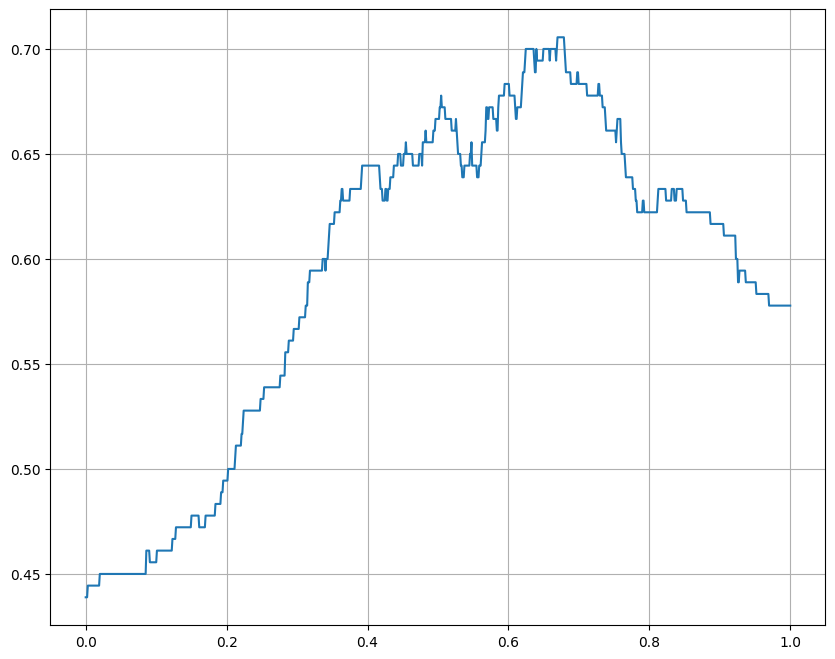

In [34]:
plt.figure(figsize=(10,8))
plt.grid()
plt.plot(thresholds, scores)
plt.show();

<u>We can use in production the threshold for which the value of accuracy is maximal</u>.

In [35]:
better_acc_index = scores.index(max(scores))
better_acc = thresholds[better_acc_index]
better_acc

0.6696696696696697

What if we'll just numerate our categories in categorical feature (label encoding)?

In [36]:
from sklearn.preprocessing import LabelEncoder

In [37]:
le = LabelEncoder()
tab['purpose'] = le.fit_transform(tab['purpose'])

In [38]:
X_le = tab[tab.columns[:-1]]
X_le

,account,duration,credit_history,amount,savings,employment,guarantors,residence,age,credits_number,job,maintenance_people,telephone,foreign,real_estate,life_insurance,car,housing_rent,sex,purpose
0,1,0.18,2,0.13110,2,2,1,4,0.34,1,2,1,0,1,0,0,1,0,1,0
1,-1,0.18,0,0.15520,1,3,1,1,0.31,1,2,1,1,1,0,1,0,0,1,0
2,-1,0.12,2,0.04510,1,3,1,4,0.21,1,2,1,0,1,0,1,0,1,1,8
3,-1,0.30,0,0.40360,0,1,1,3,0.25,3,2,1,0,1,0,0,1,0,1,0
4,0,0.36,2,0.09095,1,2,1,4,0.37,1,2,1,1,1,0,0,0,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,1,0.09,2,0.02290,1,2,1,3,0.24,1,2,1,0,1,1,0,0,0,1,9
596,0,0.48,2,0.24220,1,0,1,2,0.33,1,3,1,1,1,0,0,1,1,1,0
597,1,0.24,3,0.09825,0,2,1,4,0.42,2,2,1,1,1,0,0,1,1,0,1
598,0,0.18,1,0.32290,1,4,1,4,0.39,2,3,2,1,1,0,0,0,0,1,1


In [39]:
X_train_le, X_test_le, y_train, y_test = train_test_split(X_le, y, \
                                                    test_size=0.3, \
                                                    shuffle=True,
                                                    random_state=0
)

In [40]:
scaler = StandardScaler()
X_train_le = scaler.fit_transform(X_train_le)
X_test_le = scaler.transform(X_test_le)

In [41]:
clf = LinearRegression()

clf.fit(X_train_le, y_train)
y_pred = clf.predict(X_test_le)

accuracy_score(y_test, y_pred>0.5)

0.65

One-hot encoding seems for this problem like more effective.

<u><b>Note</b></u>: While using label encoding we can't interpret weights of the model correctly because all the categories encoded into one column and we can't separate influence of different categories of such a feature on the results of the model quality.

### Metrics counting

In [42]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, f1_score

In [43]:
import numpy as np

In [44]:
clf = LinearRegression()

clf.fit(X_train_ohe, y_train)
y_pred = clf.predict(X_test_ohe)

In [45]:
# better confusion matrix by accuracy metric
confusion_matrix(y_test, y_pred>better_acc)

array([[89, 13],
       [40, 38]], dtype=int64)

In [46]:
precision_score(y_test, y_pred>better_acc)

0.7450980392156863

In [47]:
recall_score(y_test, y_pred>better_acc)

0.48717948717948717

In [48]:
f1_score(y_test, y_pred>better_acc)

0.5891472868217054

In [49]:
thresholds = np.linspace(0, 1, 1000)
precision_scores = [precision_score(y_test, y_pred>threshold) for threshold in thresholds]
recall_scores = [recall_score(y_test, y_pred>threshold) for threshold in thresholds]
f1_scores = [f1_score(y_test, y_pred>threshold) for threshold in thresholds]

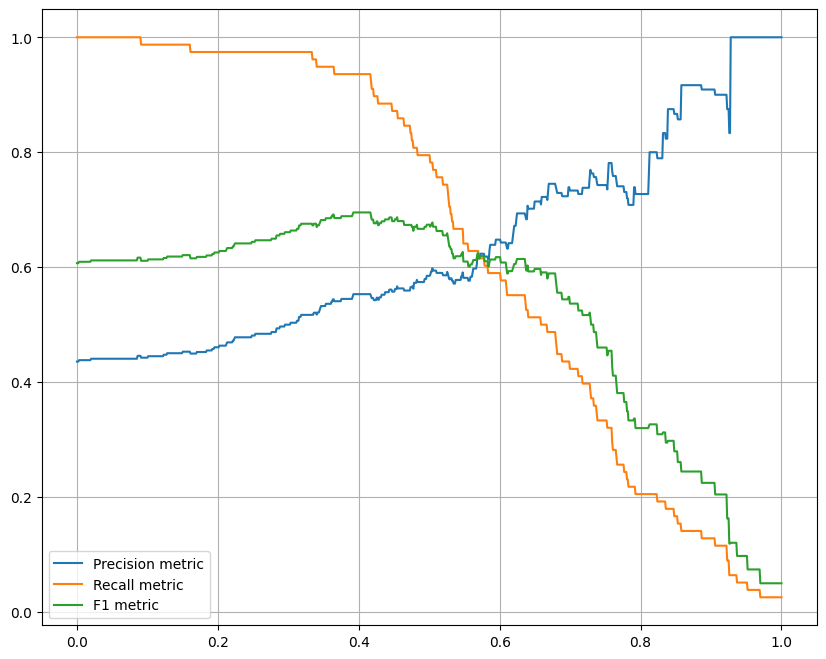

In [52]:
plt.figure(figsize=(10,8))
plt.grid()
plt.plot(thresholds, precision_scores, label="Precision metric")
plt.plot(thresholds, recall_scores, label="Recall metric")
plt.plot(thresholds, f1_scores, label="F1 metric")
plt.legend()
plt.show();

### Training of linear regression with regularization with account of F1 score

Let's train linear regression with regularization and pick up the parameter of regularization based on maximal F1 score.

In [59]:
from sklearn.linear_model import Lasso

In [60]:
clf = Lasso(0.005)

clf.fit(X_train_ohe, y_train)
y_pred = clf.predict(X_test_ohe)

F1 score for parameter 0.005 is:

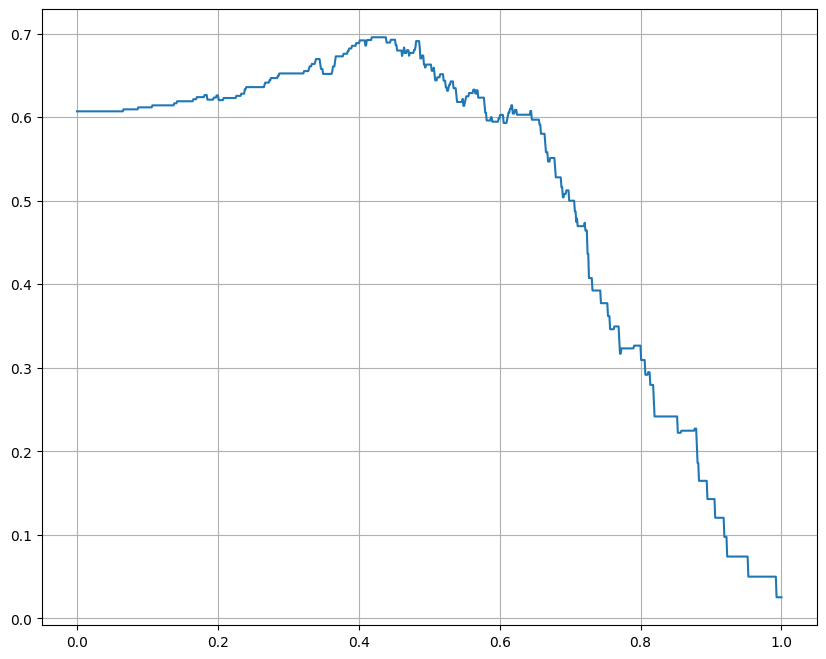

In [61]:
f1_scores = [f1_score(y_test, y_pred>threshold) for threshold in np.linspace(0, 1, 1000)]

plt.figure(figsize=(10,8))
plt.grid()
plt.plot(np.linspace(0, 1, 1000), f1_scores)
plt.show();

Now let's find the best model and plot F1 score graph the same as above but with the best regularization coefficient.

In [62]:
best_model = None
best_reg_coef = None
best_score = None

for reg_coef in np.linspace(0.00001, 0.3, 100):
    model = Lasso(reg_coef).fit(X_train_ohe, y_train)
    y_pred = model.predict(X_test_ohe)
    scores = [f1_score(y_test, y_pred>threshold) for threshold in np.linspace(0, 1, 1000)]

    if best_model is None or max(scores) > best_score:
        best_model = model
        best_reg_coef = reg_coef
        best_score = max(scores)

C:\Users\akalyuzhin\Workenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.841e-02, tolerance: 1.047e-02
  model = cd_fast.enet_coordinate_descent(


In [63]:
best_reg_coef

0.012130808080808079

In [64]:
best_score

0.7058823529411765

In [65]:
clf = Lasso(best_reg_coef)

clf.fit(X_train_ohe, y_train)
y_pred = clf.predict(X_test_ohe)

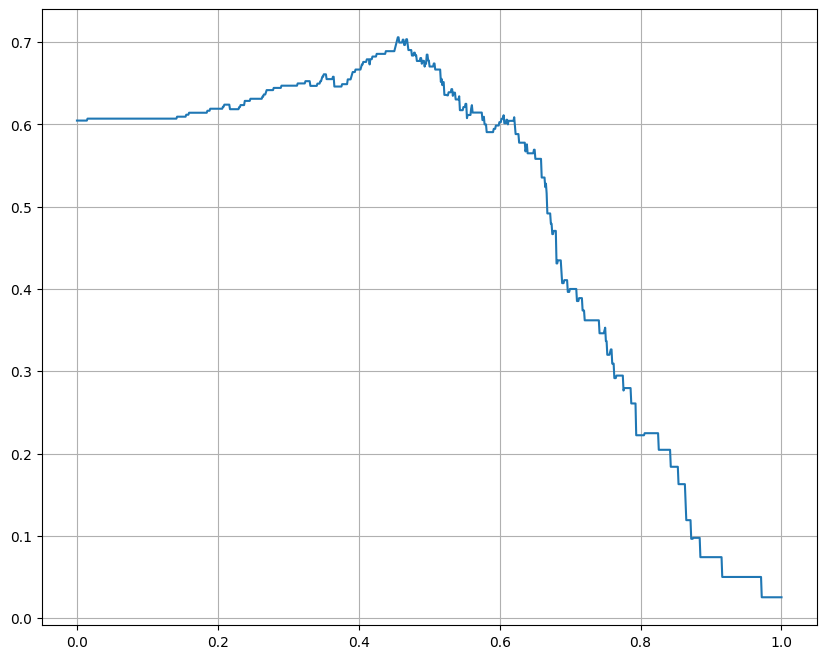

In [66]:
f1_scores = [f1_score(y_test, y_pred>threshold) for threshold in np.linspace(0, 1, 1000)]

plt.figure(figsize=(10,8))
plt.grid()
plt.plot(np.linspace(0, 1, 1000), f1_scores)
plt.show();

In [69]:
clf.coef_ # weights of the model

# Some features are zero, so the model trains better without these features

array([ 0.02326689, -0.07597322,  0.07263876, -0.02193121,  0.02240129,
        0.05159372, -0.        , -0.        ,  0.01387752, -0.01996354,
       -0.        , -0.        ,  0.00109967, -0.02725919,  0.0382852 ,
       -0.02250173,  0.02094385, -0.03571585,  0.04194621,  0.        ,
       -0.04000682,  0.05597083,  0.00612474, -0.00196284,  0.        ,
        0.00025987, -0.00661426, -0.        ,  0.        ])